In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
import seaborn as sns
from intercluster.plotting import *

%load_ext autoreload
%autoreload 2

In [2]:
# This assumes tex is installed in your system, 
# if not you may simply remove most of this aside from font.size
# To get tex working on linux run the following:
# `sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super`
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": [],
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.size": 32
})

palette = sns.color_palette("husl", 8)
cmap = ListedColormap(palette)

color_dict = {
    'KMeans' : 'grey',
    'DBSCAN' : 'grey',
    'Decision-Tree': cmap(5),
    'Removal-Tree': cmap(7),
    'ExKMC': cmap(0),
    'Shallow-Tree': cmap(2),
    'IDS': cmap(1),
    'DSCluster-Association-Rules': cmap(6),
    'DSCluster-Pointwise-Rules': cmap(3)
}

linestyle_dict = {
    'KMeans' : 'dashed',
    'DBSCAN' : 'dashed',
    'Decision-Tree' : 'solid',
    'Removal-Tree' : 'dashed',
    'ExKMC' : 'solid',
    'Shallow-Tree': 'dashed',
    'IDS': 'dashed',
    'DSCluster-Association-Rules': 'solid',
    'DSCluster-Pointwise-Rules': 'solid'
}

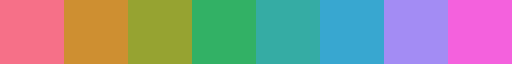

In [3]:
cmap

# Experiment Plotting:
The following is what we use to gather computed information and produce plots/tables. Note that 
our distribution plots are more reliant upon having the data readily available, and 
are therefore plotted as a part of the `interpretable_measurements.py` and `explanation_tree.py`
files. 

In [23]:
# Specify a dataset
dataset = 'digits'

# Specify reference clustering
ref = 'dbscan'

### Max Rules Experiments

In [24]:
# Load experiment results
fname = "../data/experiments/" + dataset + "/max_rules/exp_" + ref + ".csv"
experiment_df = pd.read_csv(fname, header=[0, 1, 2], index_col=0)

# Computes statistics:
grouped = experiment_df.T.groupby(level = [0,1])
mean_df = grouped.mean().T
std_df = grouped.std().T

In [25]:
mean_df

Coverage-Mistake-Score                              \
                   DBSCAN DSCluster-Association-Rules   
11                 1269.0                       254.3   
12                 1269.0                       258.3   
13                 1269.0                       261.3   
14                 1269.0                       264.6   
15                 1269.0                       267.4   
16                 1269.0                       268.7   
17                 1269.0                       270.6   
18                 1269.0                       272.2   
19                 1269.0                       274.2   
20                 1269.0                       275.6   

                                                        Silhouette-Score  \
   DSCluster-Pointwise-Rules Decision-Tree Removal-Tree           DBSCAN   
11                     378.6        -383.0       -902.5         0.048562   
12                     392.8         -73.0       -902.5         0.048562   
13                     401.6          47.0       -902.5         0.048562   
14                     411.1          97.0       -902.5         0.048562   
15                     419.5         242.0       -902.5         0.048562   
16                     427.3         267.0       -902.5         0.048562   
17                     435.1         112.0       -902.5         0.048562   
18                     442.1         287.0       -902.5         0.048562   
19                     449.3         442.0       -902.5         0.048562   
20                     454.7         442.0       -902.5         0.048562   

                                                                        \
   DSCluster-Association-Rules DSCluster-Pointwise-Rules Decision-Tree   
11                    0.083306                  0.084126      0.012827   
12                    0.081831                  0.083060      0.017884   
13                    0.082243                  0.081817      0.021975   
14                    0.081298                  0.081220      0.022265   
15                    0.080169                  0.079628      0.026035   
16                    0.079691                  0.079271      0.026503   
17                    0.078918                  0.078534      0.022897   
18                    0.079462                  0.077901      0.025266   
19                    0.079482                  0.075909      0.029217   
20                    0.079187                  0.075726      0.029217   

                max-rule-length                              \
   Removal-Tree          DBSCAN DSCluster-Association-Rules   
11     0.015013             NaN                         3.3   
12     0.015013             NaN                         3.4   
13     0.015013             NaN                         3.4   
14     0.015013             NaN                         3.6   
15     0.015013             NaN                         3.6   
16     0.015013             NaN                         3.6   
17     0.015013             NaN                         3.6   
18     0.015013             NaN                         3.7   
19     0.015013             NaN                         3.7   
20     0.015013             NaN                         3.7   

                                                         \
   DSCluster-Pointwise-Rules Decision-Tree Removal-Tree   
11                       5.0           4.0         10.0   
12                       5.1           5.0         10.0   
13                       5.0           5.0         10.0   
14                       5.0           5.0         10.0   
15                       5.3           5.0         10.0   
16                       5.4           5.0         10.0   
17                       5.4           5.0         10.0   
18                       5.6           5.0         10.0   
19                       5.6           5.0         10.0   
20                       5.6           6.0         10.0   

   weighted-average-rule-length                   

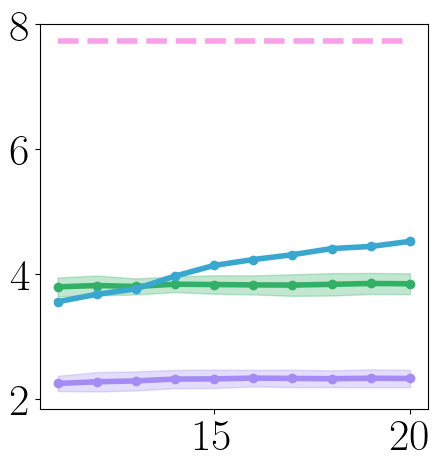

In [29]:
#measurement = 'Coverage-Mistake-Score'
#measurement = 'Silhouette-Score'
measurement = 'weighted-average-rule-length'
xaxis = True
yaxis = True

measurement_mean_df = mean_df[measurement]
measurement_std_df = std_df[measurement]

# Plot results
fig,ax = plt.subplots(1,1,figsize=(5,5))

for method in measurement_mean_df.columns:
    if measurement_mean_df[method].isnull().all():
        continue
    elif measurement_mean_df[method].nunique() == 1:
        ax.hlines(
            y = measurement_mean_df[method].iloc[0],
            xmin = measurement_mean_df.index.min(),
            xmax = measurement_mean_df.index.max(),
            color = color_dict[method],
            alpha = 0.6,
            label = method,
            linewidth = 4,
            linestyle = linestyle_dict[method]
        )
    else:
        ax.plot(
            measurement_mean_df.index,
            measurement_mean_df[method], 
            color = color_dict[method],
            label = method,
            linewidth = 4,
            marker='o',
            markersize = 6,
        )
        ax.fill_between(
            measurement_mean_df.index, 
            measurement_mean_df[method] - measurement_std_df[method],
            measurement_mean_df[method] + measurement_std_df[method],
            color= color_dict[method],
            alpha=0.3
        )


if not xaxis:
    plt.xticks([])
if not yaxis:
    plt.yticks([])
    

In [47]:
np.random.geometric(p = 1/3)

1

In [48]:
1/5

0.2

In [52]:
ismove = np.array([[True, False, False], [True, False, True]], dtype = bool)

In [57]:
np.where(ismove)

(array([0, 1, 1]), array([0, 0, 2]))

In [56]:
np.any(ismove)

True

(0.0, 1.0, 0.0, 1.0)

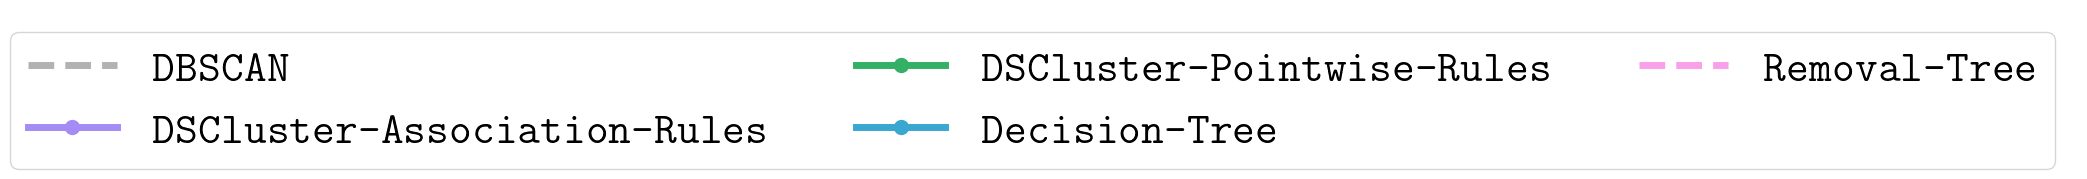

In [27]:
# Legend:
fig, ax = plt.subplots(figsize = (6,1))

legend_elements = []
for method in measurement_mean_df.columns:
    if measurement_mean_df[method].nunique() == 1:
        legend_elements += [
            mlines.Line2D(
                [], [],
                color=color_dict[method],
                lw=5,
                linestyle = linestyle_dict[method],
                label=rf"\texttt{{{method}}}",
                alpha=0.6
            )
        ]
    else:
        legend_elements += [
            mlines.Line2D(
                [], [],
                marker = 'o',
                markersize=10,
                color=color_dict[method],
                lw=5,
                label=rf"\texttt{{{method}}}",
                alpha=1
            )
        ]

ax.legend(handles=legend_elements, ncol=3)
ax.axis('off')

### Older experiments

In [16]:
# Colors and Modules for plotting:
colormap = distortion_cmap
baseline_list = ['KMeans-Full', 'IMM-Full']

# This is just a list of column names to look up in the dataframe
module_list = ['IMM', 'IMM-outliers', 'Forest-Depth-2', 
               'Forest-Depth-3','Forest-Depth-4']

# And these are their corresponding latex versions
legend_module_list = [r'\texttt{IMM}', r'\texttt{IMM-outliers}', r'\texttt{Forest-Depth-2}', 
               r'\texttt{Forest-Depth-3}',r'\texttt{Forest-Depth-4}']

# We give colors to each as follows
color_dict = {mod : i for i,mod in enumerate(module_list)}

In [17]:
# Specify the model:
model = 'Forest-Depth-2'

# And then we'll compute ratios for clustering costs:
measure = 'normalized-clustering-cost'
xlabel = 'minimum coverage'
ylabel = 'distortion'

# Uncomment here to save:
#fname = '../figures/relative_coverage/' + ylabel + '/' + dataset + '/' + model + '.png'
fname = None

xaxis = False
if dataset == 'fashion':
    xaxis = True

yaxis = False
if model == 'IMM-outliers':
    yaxis = True

if not xaxis:
    xlabel = ''
if not yaxis:
    ylabel = ''

# Compute distortion with cost ratios:
cost_df = experiment_df[measure][model]

# Divide by the reference:
distortion_df = cost_df[[model, 'IMM', 'KMeans']].div(cost_df['KMeans'], level=1)

# Find the mean and standard deviation
plot_df = distortion_df.groupby(level=0, axis=1).mean()
plot_std_df = distortion_df.groupby(level=0, axis=1).std()

# More plotting info:
plot_colors = [colormap(color_dict[mod]) for mod in plot_df.columns if mod != 'KMeans']
plot_cmap = ListedColormap(plot_colors)
domain_array = np.array([list(np.linspace(0.5,1,11))] * len(plot_df.columns)).T
domain_df = pd.DataFrame(domain_array, columns = plot_df.columns)

xlim = (0.49, 1.01)
#ylim = (plot_df.min().min() - 0.05, plot_df.max().max() + 0.05)

if dataset == 'climate':
    ylim = (0.95, 1.1)
elif dataset == 'anuran':
    ylim = (0.95, 1.7)
elif dataset == 'covertype':
    ylim = (0.95, 1.4)
elif dataset == 'digits':
    ylim = (0.95, 1.7)
elif dataset == 'mnist':
    ylim = (0.95, 1.25)
elif dataset == 'fashion':
    ylim = (0.95, 1.4)

experiment_plotter(
    plot_df,
    plot_std_df,
    domain_df,
    xlabel = xlabel,
    ylabel = ylabel,
    cmap = plot_cmap,
    baseline_list = ['KMeans'],
    legend = False,
    xlim = xlim,
    ylim = ylim,
    xaxis = xaxis,
    yaxis = yaxis,
    filename = fname,
)

KeyError: 'normalized-clustering-cost'

(0.0, 1.0, 0.0, 1.0)

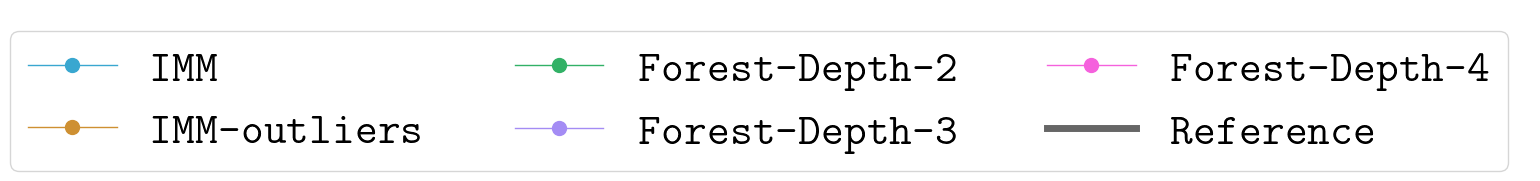

In [ ]:
# Legend:
fig, ax = plt.subplots(figsize = (6,1))
legend_elements = [
    mlines.Line2D(
        [], [],
        marker = 'o',
        markersize=10,
        color=colormap(i),
        lw=1,
        label=mod,
        alpha=1
    )
    for i,mod in enumerate(legend_module_list)
]

legend_elements += [
    mlines.Line2D(
        [], [],
        marker = 'o',
        markersize=0,
        color='k',
        lw=5,
        linestyle = '-',
        label=r"\texttt{Reference}",
        alpha=0.6
    )
]

ax.legend(handles=legend_elements, ncol=3)
ax.axis('off')
#plt.savefig('../figures/relative_coverage/distortion_legend.png', bbox_inches = 'tight', dpi = 300)

### Interpretable Measurements:

In [27]:
# Interpretable Measurements Table
fname = "../data/experiments/" + dataset + "/measurements.csv"
inter_measures_df = pd.read_csv(fname, index_col=0)
inter_measures_df

,coverage,max-rule-length,normalized-clustering-cost,overlap,weighted-average-rule-length
Row,,,,,
forest_depth_2,0.819086,2.0,35.508812,1.160737,2.000000
forest_depth_3,0.809543,3.0,33.223462,1.113150,3.000000
forest_depth_4,0.835143,4.0,32.328097,1.075334,3.627513
forest_depth_imm,0.823486,7.0,32.266952,1.083755,3.802600
imm,1.000000,7.0,39.302320,1.000000,5.052857
outlier,0.800057,6.0,36.508056,1.000000,4.946861


In [28]:
# Additional Results for explanation tree
fname = "../data/experiments/" + dataset + "/explanation_tree.csv"
explanation_tree_df = pd.read_csv(fname, index_col=0)
explanation_tree_df

,normalized-clustering-cost,overlap,coverage,max-rule-legnth,weighted-average-rule-length
0,29.855588,1.0,0.715771,7,5.109452
